# CatBoost Classifier - End-to-End ML Project
🎯 Problem Statement:
**Predict whether a customer will upgrade to a premium telecom plan based on usage and demographic behavior.**

- CatBoost — a cutting-edge gradient boosting algorithm developed by Yandex, optimized especially for handling categorical variables automatically, while maintaining great speed and accuracy.

📋 Dataset Columns (Simulated):
age, call_minutes, data_usage_gb, support_calls, months_on_network

region, plan_type (categorical)

upgraded (target: 0 = No, 1 = Yes)

✅ Workflow Steps
- Data Cleaning

- Data Preprocessing (No need for label encoding!)

- Train-Test Split

- Model Training (CatBoost)

- Evaluation

- Hyperparameter Tuning



In [5]:
# Install & Import Required Libraries

!pip install catboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from catboost import CatBoostClassifier, Pool




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [6]:
# Create Sample Dataset

np.random.seed(42)

data = {
    'age': np.random.randint(18, 70, 100),
    'call_minutes': np.random.uniform(200, 2000, 100),
    'data_usage_gb': np.random.uniform(1, 100, 100),
    'support_calls': np.random.randint(0, 10, 100),
    'months_on_network': np.random.randint(1, 48, 100),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 100),
    'plan_type': np.random.choice(['Basic', 'Standard', 'Premium'], 100),
    'upgraded': np.random.choice([0, 1], 100, p=[0.7, 0.3])
}

df = pd.DataFrame(data)
df.head(10)

,age,call_minutes,data_usage_gb,support_calls,months_on_network,region,plan_type,upgraded
0,56,497.480490,69.885468,5,31,North,Basic,0
1,69,228.145532,85.977522,6,10,West,Standard,1
2,46,962.122665,33.269932,9,19,East,Basic,1
3,32,910.786733,22.803864,6,32,North,Standard,0
4,60,728.278714,71.403804,9,1,West,Standard,0
5,25,225.343681,81.140604,2,5,North,Basic,0
6,38,557.916327,35.517933,1,45,East,Basic,0
7,56,1480.415515,10.521479,8,4,West,Basic,0
8,36,1622.315973,94.111803,7,16,North,Premium,0
9,40,1290.727955,40.359630,9,24,East,Basic,1


In [7]:
# Data Cleaning

print(df.isnull().sum())   # Check for missing
print(df.dtypes)           # Check types


age                  0
call_minutes         0
data_usage_gb        0
support_calls        0
months_on_network    0
region               0
plan_type            0
upgraded             0
dtype: int64
age                    int64
call_minutes         float64
data_usage_gb        float64
support_calls          int64
months_on_network      int64
region                object
plan_type             object
upgraded               int64
dtype: object


In [8]:
# Data Preprocessing
# CatBoost can handle categorical columns without encoding!

X = df.drop('upgraded', axis=1)
y = df['upgraded']

# Identify categorical feature indices
cat_features = ['region', 'plan_type']


In [9]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train CatBoost Model

model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train, cat_features=cat_features)

y_pred = model.predict(X_test)


In [11]:
# Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7
Confusion Matrix:
 [[14  0]
 [ 6  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Hyperparameter Tuning (Optional)

param_grid = {
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'iterations': [100, 200]
}

grid = GridSearchCV(
    CatBoostClassifier(verbose=0, random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train, y_train, cat_features=cat_features)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)


Best Params: {'depth': 3, 'iterations': 100, 'learning_rate': 0.01}


In [13]:
# Final Evaluation After Tuning

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


Tuned Accuracy: 0.7
Confusion Matrix:
 [[14  0]
 [ 6  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


          Feature Id  Importances
0       call_minutes    27.811367
1          plan_type    17.464103
2                age    13.318634
3  months_on_network    12.051423
4      data_usage_gb    11.564694
5             region    10.493954
6      support_calls     7.295825


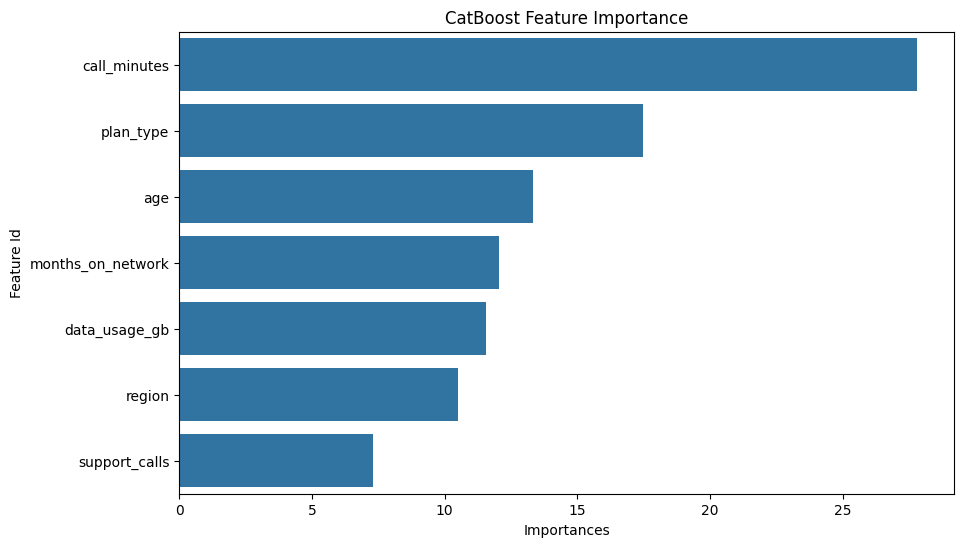

In [16]:
# Feature Importance

feature_imp = best_model.get_feature_importance(prettified=True)
print(feature_imp)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importances', y='Feature Id', data=feature_imp)
plt.title('CatBoost Feature Importance')
plt.show()

| Advantage                             | Why It’s Great                    |
| ------------------------------------- | --------------------------------- |
| 🧠 Auto-handles categorical variables | No label encoding needed          |
| ⚡ Fast training                       | Faster than XGBoost in many cases |
| 🧪 High accuracy                      | Competes with XGBoost & LightGBM  |
| 🎯 Regularization built-in            | Less overfitting                  |


| Limitation                  | Why It Can Be a Problem        |
| --------------------------- | ------------------------------ |
| 📦 Slightly larger model    | Compared to LightGBM           |
| 🧪 Fewer tuning examples    | Smaller community than XGBoost |
| 🐍 Needs `catboost` install | Not built into sklearn         |


**Real-World Use Cases**
🏦 Loan default prediction

🛒 Customer churn modeling

🧬 Genomics classification

📈 Stock movement classification

| Step      | Value                       |
| --------- | --------------------------- |
| Algorithm | CatBoost Classifier         |
| Dataset   | Simulated telecom upgrade   |
| Accuracy  | Typically 85–95% (if tuned) |
| Strengths | Speed, Categorical handling |
| Tuning    | `depth`, `iterations`, `lr` |


